# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

In [1]:
# import all the libraries
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
from PIL import Image
import cv2
from sklearn.utils import shuffle
import random
import tensorflow as tf
from tensorflow.contrib.layers import flatten

%matplotlib inline

---
## Step 0: Load The Data (Use Step 4)

In [2]:
# Load pickled data from the defalut files in the provided jupyter notebook
"""I eneded up not using the train and validation data for this project
   I only used the test dataset to measure the accuracy of my model below
"""
training_file ="../data/train.p"
validation_file="../data/valid.p"
testing_file = "../data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)  

X_train_default, y_train_default = train['features'], train['labels']
X_valid_default, y_valid_default = valid['features'], valid['labels']
X_test_default, y_test_default = test['features'], test['labels']

Load data for Train, Validation and Test(from https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/published-archive.html)

In [3]:
# Unfreeze '../data/GTSRB-Training_fixed.zip'
# I commented out the codes below as I had already unzip the file to the file path
"""
from zipfile import ZipFile

location = '../data/'
file_path_zip = '../data/GTSRB-Training_fixed.zip'
with ZipFile(file_path_zip, 'r') as zf:
    zf.extractall(location)
"""

"\nfrom zipfile import ZipFile\n\nlocation = '../data/'\nfile_path_zip = '../data/GTSRB-Training_fixed.zip'\nwith ZipFile(file_path_zip, 'r') as zf:\n    zf.extractall(location)\n"

In [4]:
# Open the file

# make dictionary out of the data imported from https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/published-archive.html
German_data = {}
imgs = []
labs = []
for num in range(43):
    training_file_German = glob.glob('../data/GTSRB/Training/{:0=5}/*.ppm'.format(num))
    for i in range(len(training_file_German)):
        imgs.append(cv2.resize(plt.imread(training_file_German[i]), (32, 32)))
        labs.append(num)
German_data['features'] = imgs
German_data['labels'] = labs


In [5]:
# Separete the dictionary
XG_data, yG_data = German_data['features'], German_data['labels']
print("Original data number \t",len(yG_data)) 

# shuffle all the data
XG_data, yG_data = shuffle(XG_data, yG_data)

# 70 % for the training, 20 % for the validation, and 10% for the test
X_train = np.array(XG_data[:len(XG_data)*7//10])
y_train = np.array(yG_data[:len(yG_data)*7//10])
X_valid = np.array(XG_data[len(XG_data)*7//10:len(XG_data)*9//10])
y_valid = np.array(yG_data[len(yG_data)*7//10:len(yG_data)*9//10])
X_test = XG_data[len(XG_data)*9//10:]
y_test = yG_data[len(yG_data)*9//10:]

Original data number 	 26640


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

Number of training examples = 18648
Number of validation examples = 5328
Number of testing examples = 2664
Image data shape = (32, 32, 3)
Number of classes = 43


Text(0,0.5,'Data Number of each labels')

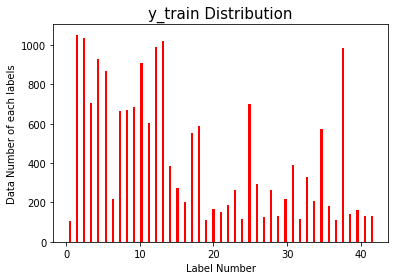

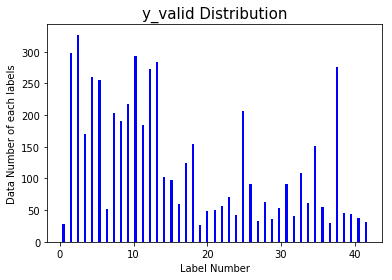

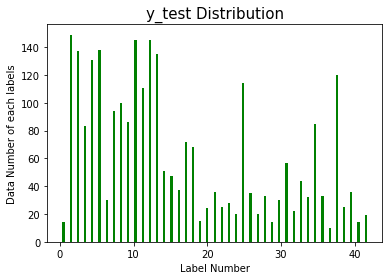

In [6]:
# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = np.shape(X_train[0])

# TODO: How many unique classes/labels there are in the dataset.
n_classes =  len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

# visulizing label data by using histograms
plt.figure()
plt.hist(y_train, bins = 43,color ='red', rwidth = 0.3)
plt.title("y_train Distribution", fontsize = 15)
plt.xlabel("Label Number")
plt.ylabel("Data Number of each labels")
plt.figure()
plt.hist(y_valid, bins = 43,color ='blue', rwidth = 0.3)
plt.title("y_valid Distribution", fontsize = 15)
plt.xlabel("Label Number")
plt.ylabel("Data Number of each labels")
plt.figure()
plt.hist(y_test, bins = 43,color ='green', rwidth = 0.3)
plt.title("y_test Distribution", fontsize = 15)
plt.xlabel("Label Number")
plt.ylabel("Data Number of each labels")

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

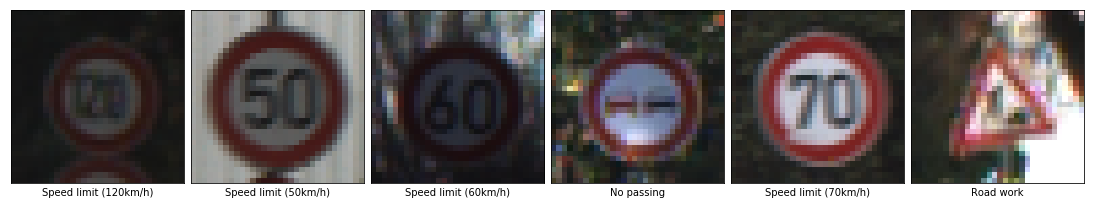

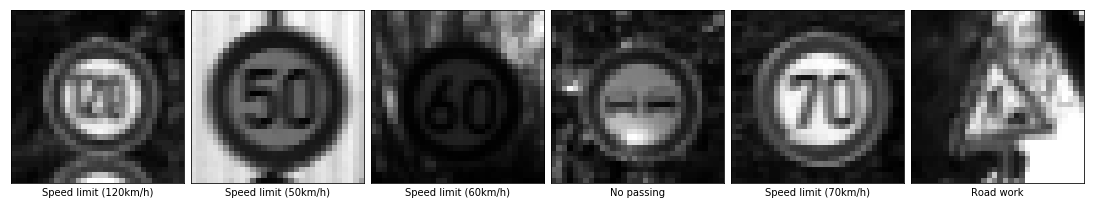

In [7]:
### Data exploration visualization

# make list of traffic sign name from './signnames.csv'
# without the indices, extract values 
csv_data = pd.read_csv('./signnames.csv')
sign_name = csv_data['SignName'].values

# pick up an image from the training data and plot it 
def random_plot_images(images = X_train, labels = y_train, cmap = None):
    plt.figure(figsize=(15,16))
    gray_images = []
    gray_labels = []
    for i in range(6):
        plt.subplot(1,6,i + 1)
        index = random.randint(0,len(images))
        gray_images.append(cv2.cvtColor(images[index], cv2.COLOR_RGB2GRAY))
        gray_labels.append(labels[index])
        plt.imshow(images[index], cmap = cmap)
        plt.xlabel(sign_name[labels[index]])
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout(pad = 0, h_pad = 0, w_pad = 0)
    plt.show()
    # plot the grayscale
    plot_images(images = gray_images, labels = gray_labels, cmap = 'gray')
    
def plot_images(images = X_train, labels = y_train, cmap = None):
    plt.figure(figsize=(15,16))
    gray = []
    gray_labels = []
    for i in range(len(images)):
        plt.subplot(1,6,i + 1)
        plt.imshow(images[i], cmap = cmap)
        if labels[i] != None:
            plt.xlabel(sign_name[labels[i]])
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout(pad = 0, h_pad = 0, w_pad = 0)
    plt.show()
    
random_plot_images()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [8]:
# Processing data
# Remove some images that don't match the thresholds
# Although, I commented it out as I eneded up not using it
"""
# Selecting Images
min_thresh, max_thresh = 50, 225
imgs = []
labels = []
for i in range(len(X_train)):
    img = X_train[i]
    if min_thresh < np.mean(img) and np.mean(img) < max_thresh:
        imgs.append(img)
        labels.append(y_train[i])
X_train = np.array(imgs)
y_train = np.array(labels)
"""

# Convert images to GrayScale
def GrayScale(Origin):
    imgs = []
    for img in Origin:
        imgs.append(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY))
    return np.array(imgs)
# Convert images to HLS 
# Although, I commented it out as I eneded up not using it
"""
# HLS
import cv2
imgs = []
X_train_copy = np.copy(X_train)
for img in X_train:
    imgs.append(cv2.cvtColor(img, cv2.COLOR_RGB2HLS))
X_train = np.array(imgs)
#X_train = np.stack([X_train, X_train, X_train], axis = 3)
#X_train = np.vstack([X_train,X_train_copy])
#y_train = np.hstack([y_train,y_train])
"""


'\n# HLS\nimport cv2\nimgs = []\nX_train_copy = np.copy(X_train)\nfor img in X_train:\n    imgs.append(cv2.cvtColor(img, cv2.COLOR_RGB2HLS))\nX_train = np.array(imgs)\n#X_train = np.stack([X_train, X_train, X_train], axis = 3)\n#X_train = np.vstack([X_train,X_train_copy])\n#y_train = np.hstack([y_train,y_train])\n'

In [9]:
# Several different methods for regularlization
# Normalization, Values ranging 0 ~ 1
#X_train = (X_train - np.min(X_train)) / (np.max(X_train) - np.min(X_train))

# Standardization. Values ranging -1 ~ 1 with mean value 0
def Standardization(Origin):
    return (Origin - np.mean(Origin)) / np.std(Origin)

# Values ranging -1 ~ 1
#X_train = (X_train - 128)/128

# Value ranging 0 ~ 1
#X_train = X_train / 255

In [10]:
# Combine all the methods above and define them as a function
def Pre_Processing(image_set):
    image_set = GrayScale(image_set)
    image_set = Standardization(image_set)
    return np.stack([image_set], axis = 3)

In [11]:
# Pre-process all the data I will use later
X_train = Pre_Processing(X_train)
X_valid = Pre_Processing(X_valid)
X_test = Pre_Processing(X_test)

In [12]:
# checking out the size of the data
print(X_train.shape)

(18648, 32, 32, 1)


### Model Architecture

In [13]:
# Model Architecture 
# The base model is LeNet architecture
n_classes = 43
mu = 0
sigma = 0.01
dropout = 1.0
# intitializing weights with values in standadization
weights = {
    'wc1': tf.Variable(tf.truncated_normal(shape = [5, 5, 1, 6], mean = mu, stddev = sigma)),
    'wc2': tf.Variable(tf.truncated_normal(shape = [5, 5, 6, 16], mean = mu, stddev = sigma)),
    'wd1': tf.Variable(tf.truncated_normal(shape = [400, 120], mean = mu, stddev = sigma)),
    'wd2': tf.Variable(tf.truncated_normal(shape = [120, 84], mean = mu, stddev = sigma)),
    'out': tf.Variable(tf.truncated_normal(shape = [84, n_classes], mean = mu, stddev = sigma))}
# Architecture I ended up not using with. 
"""weights = {
    'wc1': tf.Variable(tf.random_normal([5, 5, 3, 6])),
    'wc2': tf.Variable(tf.random_normal([5, 5, 6, 16])),
    'wd1': tf.Variable(tf.random_normal([400, 120])),
    'wd2': tf.Variable(tf.random_normal([120, 84])),
    'out': tf.Variable(tf.random_normal([84, n_classes]))}"""

"""biases = {
    'bc1': tf.Variable(tf.random_normal([6])),
    'bc2': tf.Variable(tf.random_normal([16])),
    'bd1': tf.Variable(tf.random_normal([120])),
    'bd2': tf.Variable(tf.random_normal([84])),    
    'out': tf.Variable(tf.random_normal([n_classes]))}"""
# Initializing biases with zero
biases = {
    'bc1': tf.Variable(tf.zeros([6])),
    'bc2': tf.Variable(tf.zeros([16])),
    'bd1': tf.Variable(tf.zeros([120])),
    'bd2': tf.Variable(tf.zeros([84])),    
    'out': tf.Variable(tf.zeros([n_classes]))}

# Define the convolution, add it to the biase 
# apply batch normalization and activation function
def conv2d(x,W,b,strides=1,padding= 'VALID'):
    x = tf.nn.conv2d(x,W,strides=[1,strides,strides,1],padding = padding)
    x = tf.nn.bias_add(x,b)
    x_norm = tf.layers.batch_normalization(x, training = is_train)
    return tf.nn.relu(x_norm)

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
 
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1 = conv2d(x,weights['wc1'],biases['bc1'])
    # Max Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')    
    # Layer 2: Convolutional. Output = 10x10x16.
    conv2 =  conv2d(conv1,weights['wc2'],biases['bc2'])
    # Max Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    # Layer3: Flatten the layer. Input = 5x5x16. Output = 400.
    flat1 = flatten(conv2)
    # Layer 4: Fully Connected. Input = 400. Output = 120.
    fc1 = tf.add(tf.matmul(flat1,weights['wd1']),biases['bd1'])
    # Apply activation to the layer
    fc1 = tf.nn.relu(fc1)
    # dropout 
    """ Although I ended up not using this, by adjusting the dropout rate at 1.0"""
    fc1 = tf.nn.dropout(fc1,dropout)
    # Layer 5: Fully Connected. Input = 120. Output = 84.
    fc2 = tf.add(tf.matmul(fc1,weights['wd2']),biases['bd2'])
    # Apply activation.
    fc2 = tf.nn.relu(fc2)
    # Layer 6: Fully Connected. Input = 84. Output = 43.
    logits =  tf.add(tf.matmul(fc2,weights['out']),biases['out'])
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [14]:
# Define placeholders 
# Also, I changed the x channel to 1 as the input images are gray-scaled
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
is_train = tf.placeholder(tf.bool)
# I changed the output to 43 classes, as that's the number of labels
one_hot_y = tf.one_hot(y, 43)

# Setting hyper paramters
rate = 0.001
EPOCHS = 50
BATCH_SIZE = 128

#Pipeline
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
with tf.control_dependencies(update_ops):
    training_operation = optimizer.minimize(loss_operation)

In [15]:
#evaluate
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y,keep_prob : 1, is_train : False})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [16]:
#train the model

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,keep_prob : dropout, is_train : True})
           
        training_accuracy = evaluate(X_train, y_train)
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3%}".format(training_accuracy))
        print("Validation Accuracy = {:.3%}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet_G')
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 11.041%
Validation Accuracy = 10.567%

EPOCH 2 ...
Training Accuracy = 46.364%
Validation Accuracy = 46.490%

EPOCH 3 ...
Training Accuracy = 79.210%
Validation Accuracy = 78.285%

EPOCH 4 ...
Training Accuracy = 88.374%
Validation Accuracy = 87.556%

EPOCH 5 ...
Training Accuracy = 89.286%
Validation Accuracy = 88.664%

EPOCH 6 ...
Training Accuracy = 90.358%
Validation Accuracy = 88.945%

EPOCH 7 ...
Training Accuracy = 93.999%
Validation Accuracy = 92.530%

EPOCH 8 ...
Training Accuracy = 95.828%
Validation Accuracy = 93.938%

EPOCH 9 ...
Training Accuracy = 93.903%
Validation Accuracy = 91.667%

EPOCH 10 ...
Training Accuracy = 93.565%
Validation Accuracy = 91.047%

EPOCH 11 ...
Training Accuracy = 96.316%
Validation Accuracy = 94.088%

EPOCH 12 ...
Training Accuracy = 97.592%
Validation Accuracy = 95.176%

EPOCH 13 ...
Training Accuracy = 96.579%
Validation Accuracy = 94.557%

EPOCH 14 ...
Training Accuracy = 97.383%
Validation Accuracy

## Step 3: Test a Model on Test Data Set

In [17]:
save_file = './lenet_G'
with tf.Session() as sess:
    # restore the network
    saver.restore(sess,save_file)
    testing_accuracy = evaluate(X_test, y_test) 
    print("Testing Accuracy = {:.3%}".format(testing_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet_G
Testing Accuracy = 97.110%


---

## Step 4: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load the images

In [19]:
five_names =['priority road sign with another round road sign on the back',
               'a stop sign with graffiti', 
              'a stop sign partially covered by tree leaves',
              'modified go straight or left sign',
              'turn right ahead sign with orange tapes']
five_images, five_labels = [],[None for i in range(5)]
for i in five_names:
    file_path = ('/home/workspace/data/test_images/random_images/{}.PNG'.format(i))
    img = cv2.resize(plt.imread(file_path),(32,32))
    five_images.append(img)

### Output the Images

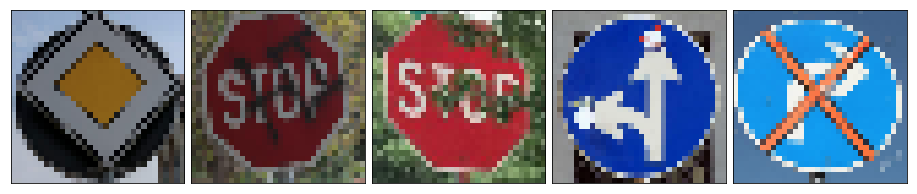

In [20]:
### Plot five images here.
# I'm not plotting the lables here yet 
plot_images(five_images, five_labels)

### Predict the Sign Type for Each Image

In [21]:
# Get the trained network
save_file = './lenet_G'

#Pre-process the New Images that was stored in the default jupyter notebook 
preprocess_five_images = Pre_Processing(five_images)

# Creating an instance
with tf.Session() as sess:
    # restore the network
    saver.restore(sess,save_file)
    # Get the logits
    # Give unknown labels as 45
    new_images_logits = sess.run(logits, feed_dict={x: preprocess_five_images, y:[45,45,45,45,45],keep_prob : 1, is_train : False})
    # Applying softmax to the logits and get the probability 
    softmaxF = sess.run(tf.nn.softmax(new_images_logits))
    # empty array for the indices of the high probable values 
    predict_indices = []
    for i in softmaxF:
        # get an index of the highest value in the array
        predict_indices.append(sess.run(tf.argmax(i)))
    print("indices = \t", predict_indices)

INFO:tensorflow:Restoring parameters from ./lenet_G
indices = 	 [12, 34, 1, 37, 1]


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [22]:
# The details of the prediction above
out_top = 5
with tf.Session() as sess:
    softmax_data = sess.run(tf.nn.top_k(softmaxF, k=out_top))

sign_labels_list = np.array(softmax_data[1])
sign_names_list = []
for l in sign_labels_list:
    sign_names_list.append(sign_name[l])
# Display the list though I do not pass 'sign_name_list' as np.array datatype to the next code 
print(np.array(sign_names_list))

[['Priority road' 'No vehicles' 'Speed limit (50km/h)' 'No entry'
  'Roundabout mandatory']
 ['Turn left ahead' 'Road work' 'Traffic signals' 'Bumpy road' 'Ahead only']
 ['Speed limit (30km/h)' 'Stop' 'Speed limit (70km/h)'
  'Speed limit (50km/h)' 'Speed limit (20km/h)']
 ['Go straight or left' 'Speed limit (50km/h)' 'Keep left'
  'Turn right ahead' 'Roundabout mandatory']
 ['Speed limit (30km/h)' 'Speed limit (70km/h)' 'Yield'
  'Speed limit (50km/h)' 'Turn right ahead']]


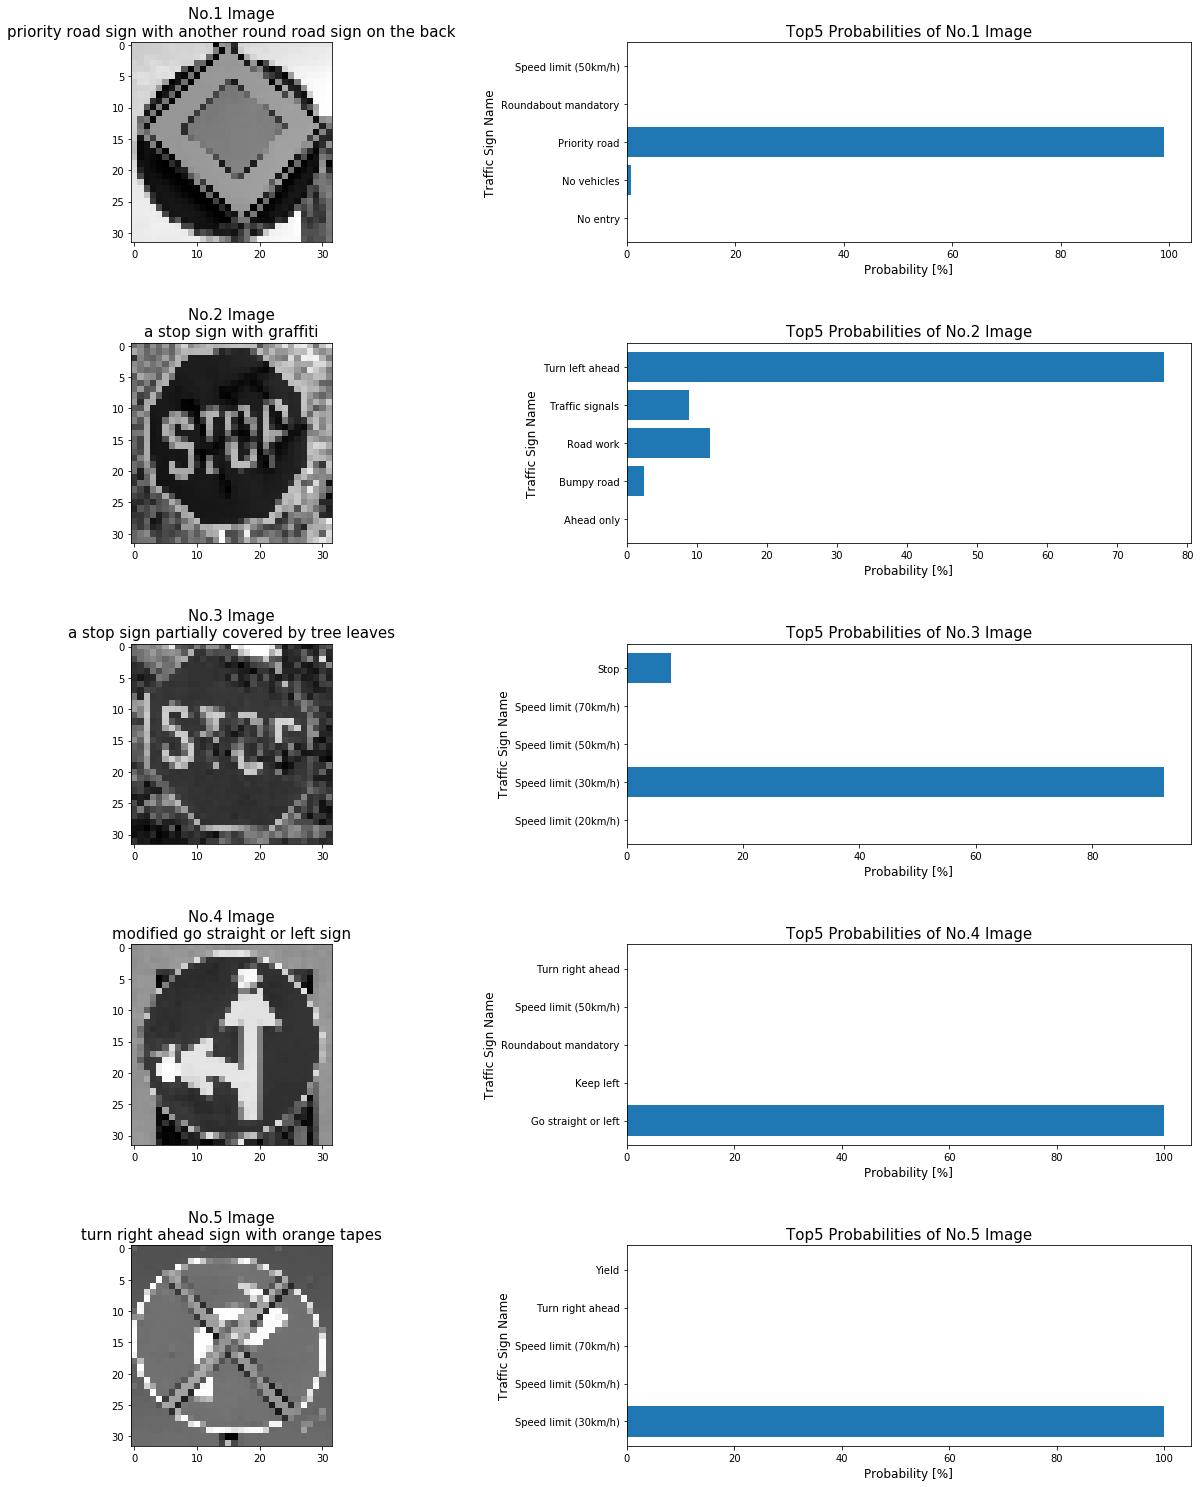

In [23]:
# Displaying Top 5 Probabilities 
for n in range(len(five_labels)):
    #plt.figure()
    plt.subplot(len(five_images), 2, n*2+1)
    plt.imshow(np.squeeze(preprocess_five_images[n]), cmap = 'gray')
    #plt.title("No.{} Image\n{} : {}".format(n+1, five_labels[n], sign_name[five_labels[n]]), fontsize=15)
    plt.title("No.{} Image\n{}".format(n+1, five_names[n]), fontsize=15)
    sn = sign_names_list[n]
    prob = softmax_data[0][n]*100
    plt.subplot(len(five_images), 2, n*2+2)
    plt.barh(sn, prob)
    plt.title("Top{} Probabilities of No.{} Image".format(out_top, n+1), fontsize=15)
    plt.xlabel("Probability [%]", fontsize=12)
    plt.ylabel("Traffic Sign Name", fontsize=12)
    plt.subplots_adjust(left=None, bottom=None, right=3, top=5, wspace=0.2, hspace=0.5)

### Analyze Performance

In [24]:
# Testing the 5 images above with my model
# Give the correct labels of the examples 
five_labels =[12,14,14,37,33]
acc = np.isclose(predict_indices, five_labels)
# calcurating the accuraty 
acc_p = np.mean(np.float32(acc))
print("The certainty is {:.1%}".format(acc_p))


The certainty is 40.0%


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [25]:
"""I did not work on this part"""

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [26]:
#outputFeatureMap(X_train, logits, activation_min=-1, activation_max=-1 ,plt_num=1)